## Introduction to Working with Geospatial Data

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In this notebook we'll see how to use the _geopandas_ library to work with geospatial data.

First, we nee to load in our data. Some common formats for geospatial data are geojson and shapefiles.

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/Metro-Government/Zip-Codes/72um-tmbe


In [2]:
zipcodes = gpd.read_file('../data/Zip Codes.geojson')
zipcodes.head( )

,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37218,NASHVILLE,None,55,{3CB897BE-ACCB-46CB-BA4E-6F5E39D6C451},None,None,None,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
1,37080,JOELTON,None,32,{C63ADE44-CC5E-4CCD-BBF0-4B8A64864B42},None,None,None,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
2,37027,BRENTWOOD,None,44,{8846D4AC-5F8A-4434-8348-C9A28297FA4E},None,None,None,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ..."
3,37086,LA VERGNE,None,5,{1618FE99-089D-4ED0-BAFA-C29A19596F3D},None,None,None,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ..."
4,37219,NASHVILLE,None,15,{B531C81C-3919-4059-8444-23F5F0684ECA},None,None,None,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


If we check the type of zipcodes, we'll see that it is a GeoDataFrame. These function largely the same as pandas DataFrames, but they have additional geometry information.

In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

For example, GeoDataFrames have a crs, or Coordinate Reference System, which determines the type of projection that is used and the units.

In [4]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Now let's look at the difference between calling the first geometry variable.....


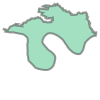

In [5]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [6]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.882314704855 36.262480354493, -86.882699985096 36.261485812789, -86.883117190452 36.261269226955, -86.883025614362 36.261238589246, -86.882548952688 36.26108228847, -86.881189972437 36.260636656103, -86.879272070205 36.260444050326, -86.87882462272 36.258881935271, -86.878711032129 36.258485362966, -86.878597422028 36.258088712826, -86.877144221494 36.257708094959, -86.877129756743 36.257688420802, -86.876634492889 36.256977787607, -86.876636188644 36.256977775304, -86.876604134915 36.256931583679, -86.876446616656 36.256704173744, -86.876252949552 36.256428127529, -86.876107147419 36.256217390174, -86.875978613035 36.256034546553, -86.875777054059 36.255750041546, -86.875718778768 36.25566366072, -86.875363605291 36.254952004985, -86.875022914166 36.255059957892, -86.873889911588 36.255413184469, -86.872985075529 36.255296657705, -86.872859638289 36.253515292224, -86.872153325485 36.252944618317, -86.872254269824 36.251515432502, -86.872273095737 36.25125377941, -8

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


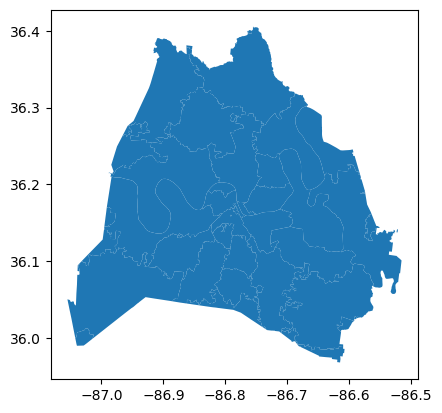

In [7]:
zipcodes.plot();

### Adding Bus Stops Information

Let's add a dataset of bus stop locations which was downloaded from https://data.nashville.gov/Transportation/WeGo-Transit-Bus-Stops/vfe9-k7vc

In [8]:
bus_stops = pd.read_csv('../data/WeGo_Transit_Bus_Stops.csv')
bus_stops.head(10)

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)"
5,4083,Z9AEDGSN,_ 9TH AVE S & EDGEHILL AVE SB,False,False,8,8TH AVENUE SOUTH,"(36.142642, -86.780897)"
6,5066,MXODONEL,DONELSON/DELL STATION OUTBOUND,True,False,"15,55",MURFREESBORO PIKE,"(36.105615, -86.672004)"
7,94,17ADORSN,17TH AVE S & DOROTHY PL SB,False,False,2,BELMONT,"(36.137623, -86.795609)"
8,3219,COC14AWN,COCKRILL ST & 14TH AVE N,False,False,42,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)"
9,4842,WED18AWN,WEDGEWOOD AVE & 18TH AVE S WB,False,False,21,UNIVERSITY CONNECTOR,"(36.137212, -86.796865)"


In [9]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Stop ID            2578 non-null   int64 
 1   Stop Abbreviation  2578 non-null   object
 2   Stop Name          2578 non-null   object
 3   Shelter?           2578 non-null   bool  
 4   Bench?             2578 non-null   bool  
 5   Route Numbers      2555 non-null   object
 6   Route Name         2578 non-null   object
 7   Mapped Location    2524 non-null   object
dtypes: bool(2), int64(1), object(5)
memory usage: 126.0+ KB


Let's say we want to combine these two datasets so that we can see which zipcode has the most bus stops.

In order to do that, we need to parse the mapped location field into latitude and longitude values.

In [10]:
bus_stops[['lat', 'lng']] = (
    bus_stops
    ['Mapped Location']
    .str.strip('()')
    .str.split(',', expand = True)
    .astype(float)
)

The geopandas library expects to be working with geometric objects (Points, Lines, Polygons) from the shapely library. We can take the lat and lng values we just created and convert them into Points.

**Note:** Shapely points have longitude first and latitude second.

In [11]:
from shapely.geometry import Point
import shapely

In [12]:
bus_stops['geometry'] = gpd.points_from_xy(bus_stops['lng'], bus_stops['lat'])

bus_stops.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,NaN,NaN,NaN,POINT EMPTY
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,NaN,NaN,NaN,POINT EMPTY
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,NaN,NaN,NaN,POINT EMPTY
3,4079,21ACHUSN,21ST AVE N & CHURCH ST SB,False,True,25,MIDTOWN,NaN,NaN,NaN,POINT EMPTY
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625)


Now, we can convert this DataFrame into a GeoDataFrame. We'll want to use the same CRS as we have for the zipcodes data.

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [13]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = bus_stops['geometry'])

In [14]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

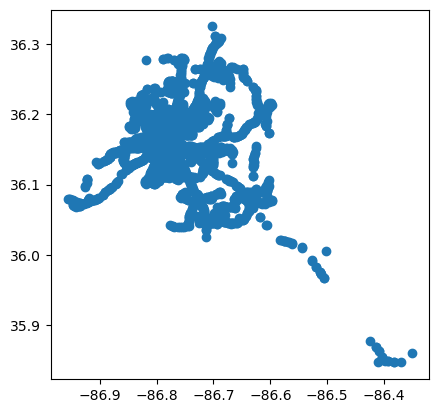

In [18]:
bus_geo.plot()

In order to combine these two GeoDataFrames, we'll use a [spatial join](https://geopandas.org/en/stable/gallery/spatial_joins.html), which allows us to combine based on the spatial relationship between their geometries.

A spatial join takes a `predicate` argument which describes the relationship that we will use to combine.

Examples:
* "intersects"
* "within"
* "contains"

In [19]:
zipcodes = zipcodes[['zipcode', 'poname', 'geometry']]

In [20]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')

In [21]:
stops_by_zip.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry,index_right,zipcode,poname
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),8,37189,WHITES CREEK
1003,4997,OLDCOBEN,OLD HICKORY BLVD & COBBLESTONE CREEK DR EB,False,False,43,HICKORY HILLS,"(36.278199, -86.789015)",36.278199,-86.789015,POINT (-86.78902 36.27820),8,37189,WHITES CREEK
1710,4933,WCHS,WHITES CREEK HIGH SCHOOL,False,False,43,HICKORY HILLS,"(36.276203, -86.819009)",36.276203,-86.819009,POINT (-86.81901 36.27620),8,37189,WHITES CREEK
2213,5331,GREKNIWF,GREEN LN & KNIGHT DR WB,False,False,41,GOLDEN VALLEY,"(36.236813, -86.803848)",36.236813,-86.803848,POINT (-86.80385 36.23681),8,37189,WHITES CREEK
2571,4995,OLDCOBWN,OLD HICKORY BLVD & COBBLESTONE CREEK DR WB,False,False,43,HICKORY HILLS,"(36.278342, -86.788981)",36.278342,-86.788981,POINT (-86.78898 36.27834),8,37189,WHITES CREEK


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [22]:
stops_by_zip['zipcode'].value_counts()

37207    272
37203    237
37206    205
37211    174
37208    165
37209    149
37210    141
37217    121
37115    106
37013    103
37204     90
37216     88
37214     87
37212     86
37218     83
37215     53
37205     52
37076     50
37219     48
37221     45
37201     36
37138     32
37228     27
37213     10
37027      9
37072      7
37189      5
37240      4
Name: zipcode, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [23]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zipcode'] == '37207']
stops_in_37207.shape

(272, 14)

In [24]:
polygon37207 = zipcodes.loc[zipcodes['zipcode'] == '37207']
polygon37207.shape

(2, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

In [25]:
stops_by_zip

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,Mapped Location,lat,lng,geometry,index_right,zipcode,poname
4,4133,GRWHIWN,GREEN LN & WHITES CREEK PIKE WB,False,False,41,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),8,37189,WHITES CREEK
1003,4997,OLDCOBEN,OLD HICKORY BLVD & COBBLESTONE CREEK DR EB,False,False,43,HICKORY HILLS,"(36.278199, -86.789015)",36.278199,-86.789015,POINT (-86.78902 36.27820),8,37189,WHITES CREEK
1710,4933,WCHS,WHITES CREEK HIGH SCHOOL,False,False,43,HICKORY HILLS,"(36.276203, -86.819009)",36.276203,-86.819009,POINT (-86.81901 36.27620),8,37189,WHITES CREEK
2213,5331,GREKNIWF,GREEN LN & KNIGHT DR WB,False,False,41,GOLDEN VALLEY,"(36.236813, -86.803848)",36.236813,-86.803848,POINT (-86.80385 36.23681),8,37189,WHITES CREEK
2571,4995,OLDCOBWN,OLD HICKORY BLVD & COBBLESTONE CREEK DR WB,False,False,43,HICKORY HILLS,"(36.278342, -86.788981)",36.278342,-86.788981,POINT (-86.78898 36.27834),8,37189,WHITES CREEK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,104,1SJAMNM,N 1ST ST & JAMES ROBERTSON PKWY NB,False,False,"14,23,43",WHITES CREEK,"(36.172643, -86.773761)",36.172643,-86.773761,POINT (-86.77376 36.17264),15,37213,NASHVILLE
1672,2100,WOON1SEN,WOODLAND ST & S 2ND ST EB,False,True,"20,4",SHELBY,"(36.169429, -86.771159)",36.169429,-86.771159,POINT (-86.77116 36.16943),15,37213,NASHVILLE
1800,1574,1SOLDSM,N 1ST ST & OLDHAM ST SB,False,False,"14,23,43",WHITES CREEK,"(36.172806, -86.77405)",36.172806,-86.774050,POINT (-86.77405 36.17281),15,37213,NASHVILLE
2164,782,1SOLDNN,N 1ST ST & OLDHAM ST NB,False,False,"14,23,43",WHITES CREEK,"(36.173965, -86.773974)",36.173965,-86.773974,POINT (-86.77397 36.17397),15,37213,NASHVILLE


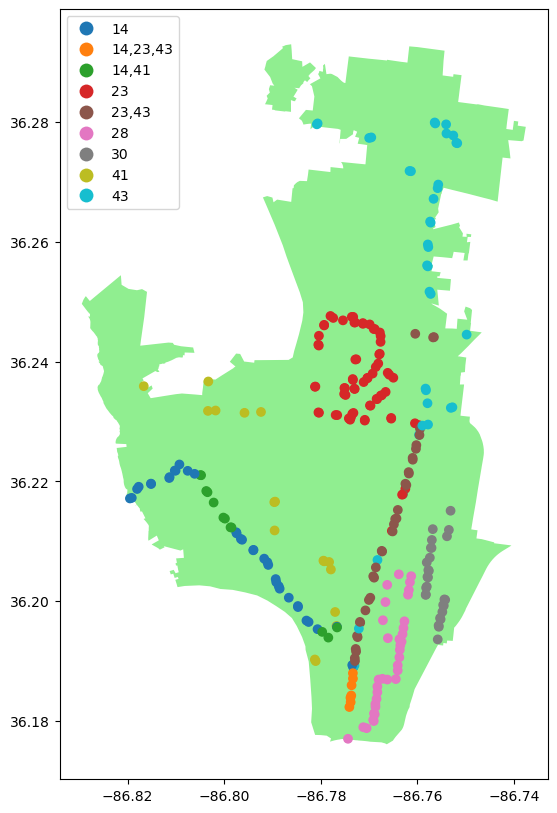

In [26]:
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'Route Numbers', legend = True);

# Introduction to the folium Library

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [27]:
polygon37207.to_crs('+proj=cea').centroid.to_crs(polygon37207.crs)

18    POINT (-86.77677 36.23244)
39    POINT (-86.78726 36.28724)
dtype: geometry

Let's grab the first one.

In [28]:
center = polygon37207.to_crs('+proj=cea').centroid.to_crs(polygon37207.crs).iloc[0]

#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [29]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23243793508427, -86.77676883270837]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [30]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [31]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 13
values are:
 
Stop ID                                       4954
Stop Abbreviation                         DOVMOOEF
Stop Name            DOVERSIDE DR & MOORWOOD DR EB
Shelter?                                     False
Bench?                                       False
Route Numbers                                   23
Route Name                          DICKERSON ROAD
Mapped Location            (36.240342, -86.772854)
lat                                      36.240342
lng                                     -86.772854
geometry              POINT (-86.772854 36.240342)
index_right                                     18
zipcode                                      37207
poname                                   NASHVILLE
Name: 13, dtype: object
------------------------- 
index is 15
values are:
 
Stop ID                                        1826
Stop Abbreviation                          ROWBUESN
Stop Name            ROWAN DR & BUENA VISTA PIKE SB
Shelter?                   

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [32]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Route Numbers'])
    icon=folium.Icon(color="blue",
                     icon="bus",
                     prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

In [33]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Route Numbers'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [34]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)

#display our map
map_37207